In [1]:
import pandas as pd
# Load the Excel file
excel_file = pd.ExcelFile("modul5.xlsx")

# Get the sheet names
sheet_names = ["kertas","Mika","Stik","4_kertas_vertikal"]

# Create an empty dictionary to store the dataframes
df = {}


# Loop through the sheet names and load each sheet into a dataframe
for sheet_name in sheet_names:
    tmp_df = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1)
    df[sheet_name+"_horizontal_1"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="A:B")
    df[sheet_name+"_horizontal_2"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="E:F")
    df[sheet_name+"_horizontal_3"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="I:J")
    df[sheet_name+"_vertikal_1"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="U:V")
    df[sheet_name+"_vertikal_2"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="Y:Z")
    df[sheet_name+"_vertikal_3"] = pd.read_excel('modul5.xlsx', sheet_name=sheet_name, skiprows=1, usecols="AC:AD")


In [2]:
df["Mika_vertikal_3"]

,Force.5,Strain.5
0,0.133986,0.000000
1,0.117381,0.000200
2,0.121389,0.001299
3,0.128833,0.002964
4,0.137422,0.005295
...,...,...
1053,NaN,NaN
1054,NaN,NaN
1055,NaN,NaN
1056,NaN,NaN


In [3]:
import matplotlib.pyplot as plt

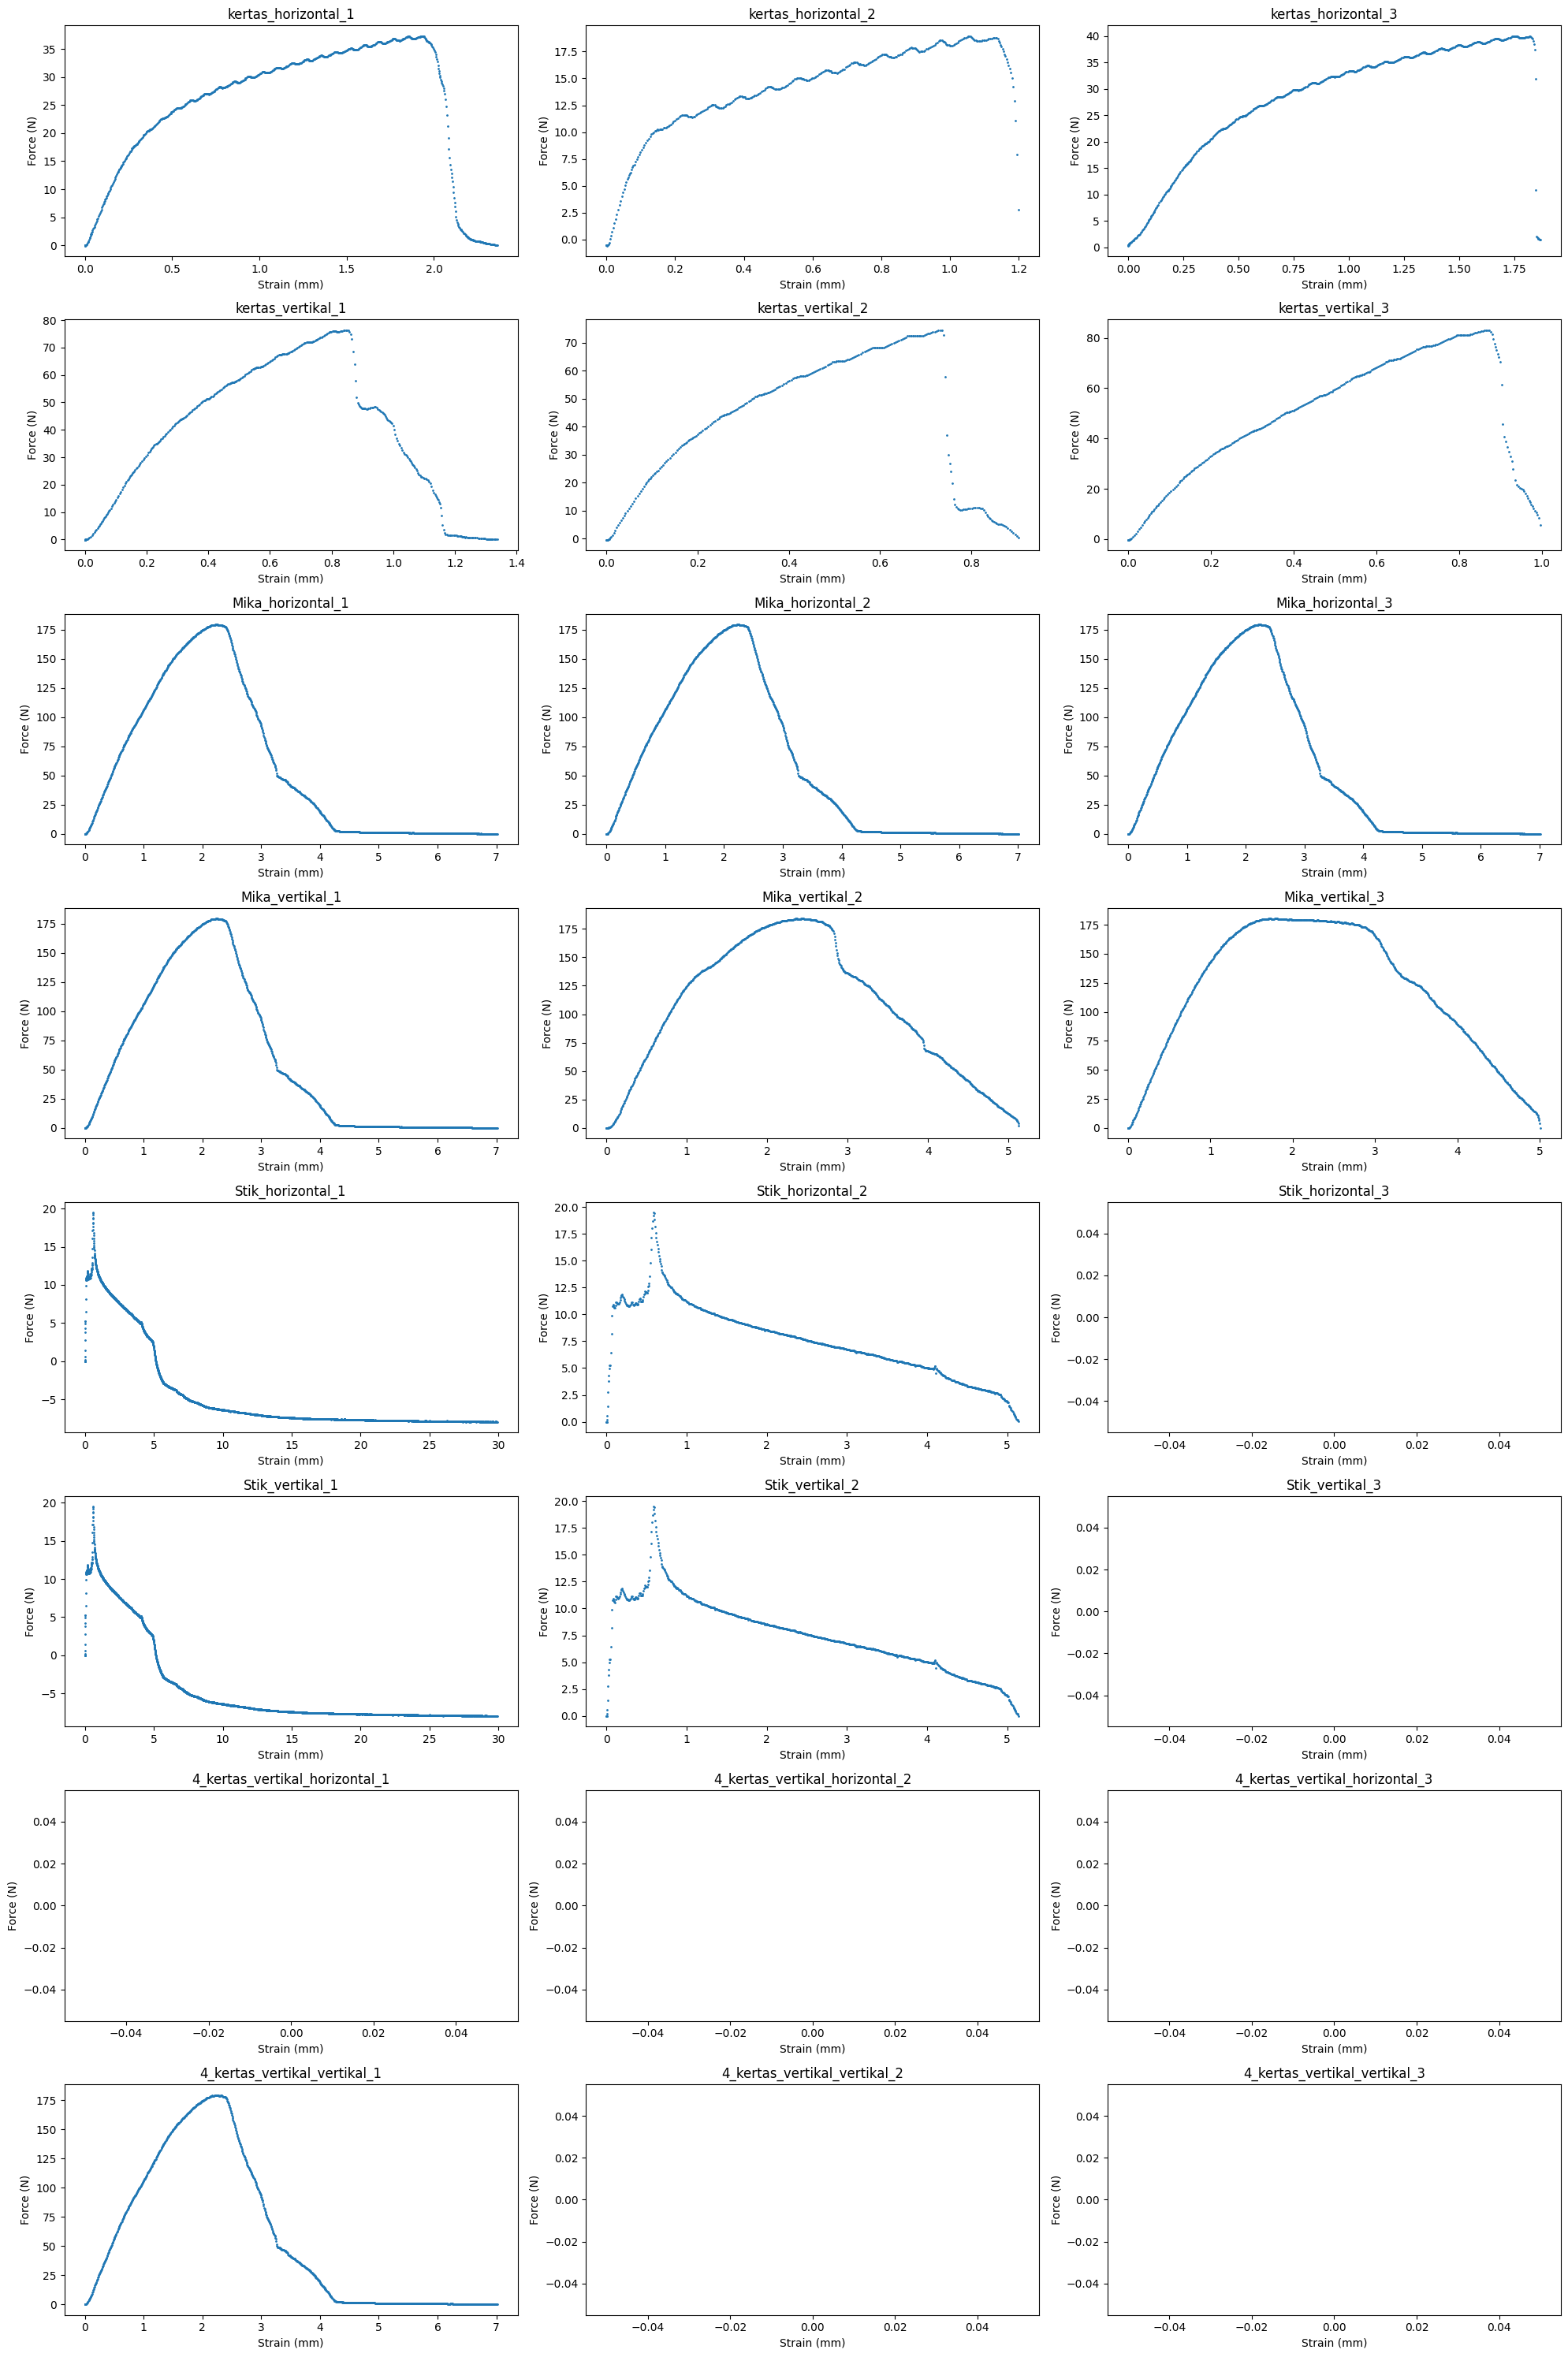

In [4]:
plt.figure(figsize=(20, 30))

for i, (key, dataframe) in enumerate(df.items(), 1):
    plt.subplot(8, 3, i)
    
    # Identify the Force and Length columns
    force_col = dataframe.columns[0]
    length_col = dataframe.columns[1]
    
    plt.scatter(dataframe[length_col], dataframe[force_col], s=1)
    plt.title(key)
    plt.xlabel('Strain (mm)')
    plt.ylabel('Force (N)')
    
plt.tight_layout()
plt.show()

Skipping Stik_horizontal_3: No valid numeric data points after NaN removal.
Skipping Stik_vertikal_3: No valid numeric data points after NaN removal.
Skipping 4_kertas_vertikal_horizontal_1: No valid numeric data points after NaN removal.
Skipping 4_kertas_vertikal_horizontal_2: No valid numeric data points after NaN removal.
Skipping 4_kertas_vertikal_horizontal_3: No valid numeric data points after NaN removal.
Skipping 4_kertas_vertikal_vertikal_2: No valid numeric data points after NaN removal.
Skipping 4_kertas_vertikal_vertikal_3: No valid numeric data points after NaN removal.


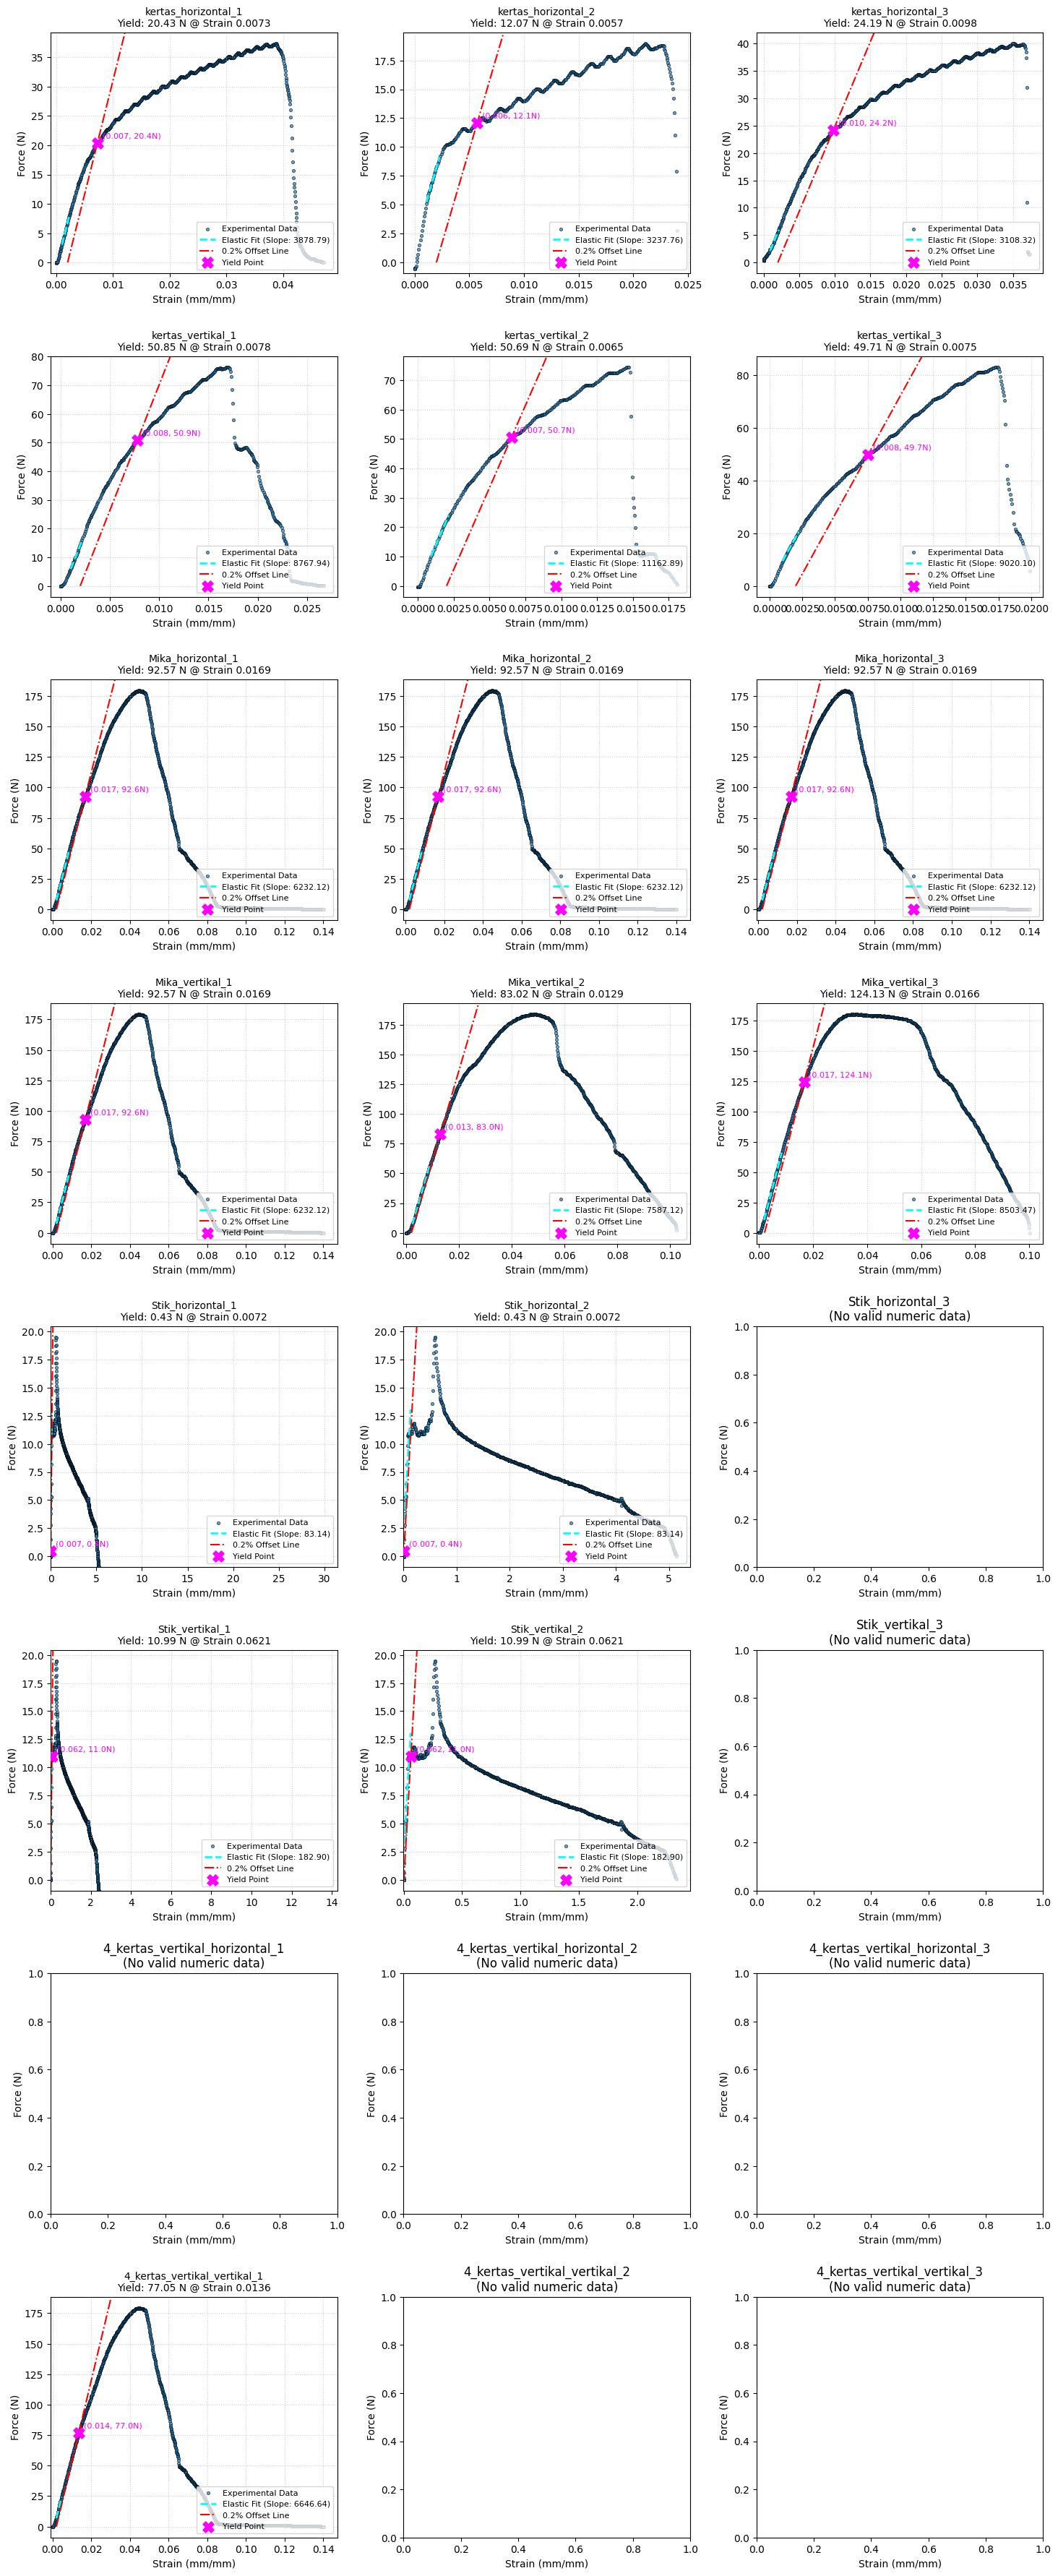

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Already imported, but good practice if this cell is run independently

# Assume 'df' is the dictionary of DataFrames loaded in a previous cell
# Example:
# df = {
# 'kertas_horizontal_1': pd.DataFrame(...)
# }

# Define initial lengths for different materials (in mm)
# Adjust these values as per your experimental setup
initial_lengths_vertical = { #mm
    "kertas": 50.0,
    "mika": 50.0,
    "stik": 2.2,
    "4_kertas_vertikal": 50.0,
}
initial_lengths_horizontal = { #mm
    "kertas": 50.0,
    "mika": 50.0,
    "stik": 1.0,
    "4_kertas_vertikal": 50.0,
}
initial_points_range = { # indices [start, end) for elastic region fitting
    "kertas": [10,30],
    "mika": [10,60],
    "stik": [0,20],
    "4_kertas_vertikal": [10,30],
}
# Default initial length if material not in the dictionary above
default_initial_length = 60.0 # Example default

# Determine the number of rows and columns for subplots
num_plots = len(df)
num_cols_plot = 3  # You can adjust this
num_rows_plot = (num_plots + num_cols_plot - 1) // num_cols_plot

plt.figure(figsize=(5 * num_cols_plot, 4.5 * num_rows_plot)) # Dynamic figure size
plot_index = 1

for key, dataframe in df.items():
    plt.subplot(num_rows_plot, num_cols_plot, plot_index)

    key_lower = key.lower()
    material_type = None
    if "kertas" in key_lower:
        material_type = "kertas"
    elif "mika" in key_lower:
        material_type = "mika"
    elif "stik" in key_lower:
        material_type = "stik"

    # Determine the initial length based on the key
    current_initial_length = default_initial_length # Start with default
    selected_length_dict = None

    if "vertical" in key_lower or "vertikal" in key_lower: # Accommodate "vertikal" from df keys
        selected_length_dict = initial_lengths_vertical
    elif "horizontal" in key_lower:
        selected_length_dict = initial_lengths_horizontal

    if material_type and selected_length_dict:
        if material_type in selected_length_dict:
            current_initial_length = selected_length_dict[material_type]
        else:
            print(f"Warning for {key}: Material '{material_type}' not found in the orientation-specific length dictionary. Using default length {default_initial_length}mm.")
    elif material_type and not selected_length_dict:
        print(f"Warning for {key}: Orientation (e.g., 'vertical'/'horizontal') not recognized in key '{key}' for material '{material_type}'. Using default length {default_initial_length}mm.")
    elif not material_type and selected_length_dict:
        print(f"Warning for {key}: Material type not recognized in key '{key}'. Using default length {default_initial_length}mm.")
    else: # neither material nor orientation recognized for specific dicts
        print(f"Warning for {key}: Material type and/or orientation not recognized in key '{key}' for specific length settings. Using default length {default_initial_length}mm.")


    if dataframe.empty or len(dataframe.columns) < 2:
        print(f"Skipping {key}: DataFrame is empty or has too few columns.")
        plt.title(f"{key}\n(Empty or invalid data)")
        plt.xlabel('Strain (mm/mm)')
        plt.ylabel('Force (N)')
        plot_index += 1
        continue

    try:
        # User's plotting implies: column 0 is Force (Y), column 1 is Length/Elongation (X)
        force_data_raw = pd.to_numeric(dataframe.iloc[:, 0], errors='coerce')
        elongation_data_raw = pd.to_numeric(dataframe.iloc[:, 1], errors='coerce')
    except IndexError:
        print(f"Skipping {key}: Could not access columns by index.")
        plt.title(f"{key}\n(Column access error)")
        plt.xlabel('Strain (mm/mm)')
        plt.ylabel('Force (N)')
        plot_index += 1
        continue

    # Align data after dropping NaNs from either series
    valid_indices = force_data_raw.notna() & elongation_data_raw.notna()
    if not np.any(valid_indices):
        print(f"Skipping {key}: No valid numeric data points after NaN removal.")
        plt.title(f"{key}\n(No valid numeric data)")
        plt.xlabel('Strain (mm/mm)')
        plt.ylabel('Force (N)')
        plot_index += 1
        continue

    force = force_data_raw[valid_indices].values
    elongation = elongation_data_raw[valid_indices].values

    if len(force) < 2:
        print(f"Skipping {key}: Less than 2 valid data points after NaN removal.")
        plt.title(f"{key}\n(<2 valid data points)")
        plt.scatter(elongation / current_initial_length if len(elongation)>0 and current_initial_length != 0 else [0], force if len(force)>0 else [0], s=5)
        plt.xlabel('Strain (mm/mm)')
        plt.ylabel('Force (N)')
        plot_index += 1
        continue

    # Sort data by elongation
    sort_indices = np.argsort(elongation)
    elongation = elongation[sort_indices]
    force = force[sort_indices]

    strain = elongation / current_initial_length if current_initial_length != 0 else np.zeros_like(elongation)
    if current_initial_length == 0:
        print(f"Warning for {key}: current_initial_length is zero. Strain calculation will result in zeros or NaNs.")


    # --- 1. Determine Modulus (Slope of the elastic region) ---
    # Filter for positive strain and force for modulus calculation
    valid_modulus_points = (strain > 1e-9) & (force > 1) # Use a small epsilon to avoid zero issues

    slope_E = np.nan # Initialize slope as nan
    elastic_strain_fit_plot = np.array([])
    elastic_force_fit_plot = np.array([])

    if np.sum(valid_modulus_points) >= 2:
        strain_mod = strain[valid_modulus_points]
        force_mod = force[valid_modulus_points]

        # Determine points range for elastic fit using initial_points_range
        slice_start, slice_end = None, None
        
        # material_type was determined earlier
        if material_type and material_type in initial_points_range:
            point_range = initial_points_range[material_type]
            slice_start_candidate = point_range[0]
            slice_end_candidate = point_range[1] # Exclusive for slicing

            # Adjust slice_end and slice_start to be within bounds of strain_mod
            if len(strain_mod) > 0:
                slice_start = max(0, slice_start_candidate)
                slice_start = min(slice_start, len(strain_mod) - 1) # Ensure start is a valid index
                
                slice_end = max(0, slice_end_candidate)
                slice_end = min(slice_end, len(strain_mod)) # Ensure end is within bounds (exclusive)
                
                if slice_start >= slice_end or (slice_end - slice_start) < 2: # if range is invalid or too small
                    print(f"Warning for {key}: Specified range [{slice_start_candidate},{slice_end_candidate}] for material '{material_type}' resulted in an invalid/small slice [{slice_start}:{slice_end}] for data length {len(strain_mod)}. Attempting fallback.")
                    slice_start, slice_end = None, None # Invalidate to trigger fallback
            else: # strain_mod is empty
                print(f"Warning for {key}: strain_mod is empty for material '{material_type}'. Cannot apply initial_points_range.")
                slice_start, slice_end = None, None


        # Fallback logic if specific range not found, invalid, or results in too few points
        if not (slice_start is not None and slice_end is not None and (slice_end - slice_start) >= 2):
            if material_type and material_type in initial_points_range and not (slice_start is not None and slice_end is not None and (slice_end - slice_start) >= 2):
                 # This case means initial_points_range was found but led to an invalid slice after adjustment
                 pass # Warning already printed above
            elif material_type and material_type not in initial_points_range :
                 print(f"Warning for {key}: Material '{material_type}' not in initial_points_range. Using fallback slice for elastic region points.")
            elif not material_type:
                 print(f"Warning for {key}: Material type not identified. Using fallback slice for elastic region points.")


            if len(strain_mod) >= 2:
                # Default fallback slice, e.g., points from index 5 up to 20 (or fewer if data is short)
                fs = 5  # fallback_start_index
                fe = 20 # fallback_end_index (exclusive)
                
                fs = min(fs, len(strain_mod) - 2) # Ensure start allows for at least 2 points
                if fs < 0: fs = 0
                fe = min(fe, len(strain_mod))    # Ensure end is within bounds
                
                if (fe - fs) >= 2:
                    slice_start = fs
                    slice_end = fe
                    print(f"Info for {key}: Using fallback elastic region slice [{slice_start}:{slice_end}].")
                else:
                    # Fallback also failed
                    slice_start, slice_end = None, None 
            else: # Not enough points in strain_mod for any fallback
                slice_start, slice_end = None, None
            
            if not (slice_start is not None and slice_end is not None and (slice_end - slice_start) >= 2):
                 print(f"Warning for {key}: Fallback slice logic also resulted in < 2 points. Not enough data for elastic fit.")


        current_elastic_strain_fit = np.array([])
        current_elastic_force_fit = np.array([])

        if slice_start is not None and slice_end is not None and (slice_end - slice_start) >= 2:
            current_elastic_strain_fit = strain_mod[slice_start:slice_end]
            current_elastic_force_fit = force_mod[slice_start:slice_end]
        # else: current_elastic_strain_fit/force_fit remain empty if no valid slice

        if len(current_elastic_strain_fit) >= 2:
            coeffs = np.polyfit(current_elastic_strain_fit, current_elastic_force_fit, 1)
            slope_E = coeffs[0]
            elastic_strain_fit_plot = current_elastic_strain_fit # For plotting the fitted line points
            elastic_force_fit_plot = np.polyval(coeffs, current_elastic_strain_fit) # For plotting the fitted line
            if slope_E <= 1e-9: # Check for non-positive or extremely small slope
                print(f"Warning for {key}: Non-positive or very small elastic slope ({slope_E:.2e}). Yield strength may be unreliable.")
                slope_E = np.nan # Invalidate slope for further calculations
        else:
            print(f"Warning for {key}: Not enough points (found {len(current_elastic_strain_fit)}) to determine elastic slope reliably using range [{slice_start}:{slice_end}].")
            slope_E = np.nan
    else:
        print(f"Warning for {key}: Not enough valid positive strain/force points for modulus calculation (found {np.sum(valid_modulus_points)}).")
        slope_E = np.nan

    # --- Plot original data and elastic fit line ---
    plt.scatter(strain, force, s=10, label='Experimental Data', alpha=0.7, edgecolors='k', linewidths=0.5)
    if len(elastic_strain_fit_plot) > 0 and not np.isnan(slope_E):
        plt.plot(elastic_strain_fit_plot, elastic_force_fit_plot, color='cyan', linestyle='--', linewidth=2, label=f'Elastic Fit (Slope: {slope_E:.2f})')

    yield_force_val = np.nan
    yield_strain_val = np.nan

    if not np.isnan(slope_E) and slope_E > 1e-9:
        # --- 2. Define the 0.2% Offset Line ---
        strain_offset_val = 0.002
        
        offset_line_strain_plot = np.linspace(strain_offset_val, np.max(strain) if len(strain)>0 else strain_offset_val + 0.01, 100)
        offset_line_force_plot = slope_E * (offset_line_strain_plot - strain_offset_val)
        
        # Filter out negative force values for plotting the offset line
        valid_offset_plot_mask = offset_line_force_plot >= 0
        plt.plot(offset_line_strain_plot[valid_offset_plot_mask], offset_line_force_plot[valid_offset_plot_mask], color='red', linestyle='-.', label='0.2% Offset Line')

        # --- 3. Find the Intersection Point ---
        relevant_strain_mask = strain >= strain_offset_val
        if np.any(relevant_strain_mask):
            strain_relevant = strain[relevant_strain_mask]
            force_relevant = force[relevant_strain_mask]

            if len(strain_relevant) > 0: # Ensure there are points to check
                force_on_offset_line_at_exp_strains = slope_E * (strain_relevant - strain_offset_val)
                force_diff = force_relevant - force_on_offset_line_at_exp_strains
                
                sign_changes_indices = np.where(np.diff(np.sign(force_diff)))[0]

                if len(sign_changes_indices) > 0:
                    idx_before_crossing = sign_changes_indices[0]
                    
                    if idx_before_crossing + 1 < len(strain_relevant): # Ensure there's a point after crossing
                        s1, f1_exp = strain_relevant[idx_before_crossing], force_relevant[idx_before_crossing]
                        s2, f2_exp = strain_relevant[idx_before_crossing + 1], force_relevant[idx_before_crossing + 1]
                        
                        # Interpolation
                        m_exp = (f2_exp - f1_exp) / (s2 - s1) if (s2 - s1) != 0 else 0
                        c_exp = f1_exp - m_exp * s1
                        
                        if abs(m_exp - slope_E) < 1e-9: # Avoid division by zero if lines are parallel
                            print(f"Warning for {key}: Experimental segment nearly parallel to offset line. Using closest point.")
                            closest_idx_in_relevant = np.argmin(np.abs(force_diff))
                            yield_strain_val = strain_relevant[closest_idx_in_relevant]
                            yield_force_val = force_relevant[closest_idx_in_relevant]
                        else:
                            # (c_exp + m_exp*x) = slope_E * (x - strain_offset_val)
                            # c_exp + m_exp*x = slope_E*x - slope_E*strain_offset_val
                            # c_exp + slope_E*strain_offset_val = (slope_E - m_exp)*x
                            # x = (c_exp + slope_E*strain_offset_val) / (slope_E - m_exp)
                            # yield_strain_val = (-slope_E * strain_offset_val - c_exp) / (m_exp - slope_E) # Original
                            yield_strain_val = (c_exp + slope_E * strain_offset_val) / (slope_E - m_exp) # Corrected algebra for x
                            yield_force_val = slope_E * (yield_strain_val - strain_offset_val)

                            # Sanity check: yield point should be within the segment and positive
                            if not (min(s1, s2) <= yield_strain_val <= max(s1, s2)) or yield_force_val < 0:
                                print(f"Warning for {key}: Interpolated yield point ({yield_strain_val:.4f}, {yield_force_val:.2f}N) outside segment [{s1:.4f}-{s2:.4f}] or invalid. Using closest point.")
                                closest_idx_in_relevant = np.argmin(np.abs(force_diff)) # find index of minimum absolute difference
                                yield_strain_val = strain_relevant[closest_idx_in_relevant]
                                # Use the experimental force or the offset line force at this strain
                                yield_force_val = max(0, force_relevant[closest_idx_in_relevant]) # Ensure non-negative
                    else: # Crossing at the very last segment, use the last relevant point
                         yield_strain_val = strain_relevant[-1]
                         yield_force_val = force_relevant[-1]
                         print(f"Warning for {key}: Intersection search near end of data. Using last relevant point.")

                else: # No sign change / no crossing found
                    # Check if curve is always above or below
                    if len(force_diff) > 0:
                        if np.all(force_diff > 0): # Curve always above
                            print(f"Warning for {key}: Experimental curve entirely above offset line (after 0.2% strain). Yield may be very early or data noisy. Using point with min positive difference.")
                            positive_diffs = force_diff[force_diff > 0]
                            if len(positive_diffs) > 0:
                                closest_idx_in_relevant = np.where(force_diff == np.min(positive_diffs))[0][0]
                                yield_strain_val = strain_relevant[closest_idx_in_relevant]
                                yield_force_val = max(0, force_relevant[closest_idx_in_relevant])
                            else: # Should not happen if np.all(force_diff > 0) and len(force_diff)>0
                                print(f"Warning for {key}: No positive difference found despite curve being above offset line. No yield point by this method.")
                        elif np.all(force_diff < 0): # Curve always below
                             print(f"Warning for {key}: Experimental curve entirely below offset line. No yield point by this method.")
                        # else: mixed signs but no crossing (e.g. touches and goes away) - argmin(abs(force_diff))
                        else: # Touches or complex, use closest point to offset line
                            closest_idx_in_relevant = np.argmin(np.abs(force_diff))
                            yield_strain_val = strain_relevant[closest_idx_in_relevant]
                            yield_force_val = max(0, force_relevant[closest_idx_in_relevant])
                            print(f"Warning for {key}: No clear crossing. Using point closest to offset line.")
                    else:
                        print(f"No intersection found for {key} (no relevant data for diff).")
            else:
                print(f"No data points at or beyond 0.2% strain offset for {key}.")
        else:
            print(f"No data points at or beyond 0.2% strain offset for {key}.")


    # --- Final Plotting Details ---
    plot_title = key
    if not np.isnan(yield_force_val) and not np.isnan(yield_strain_val) and yield_force_val >=0:
        plt.scatter([yield_strain_val], [yield_force_val], color='magenta', s=120, zorder=5, marker='X', label=f'Yield Point')
        plot_title += f'\nYield: {yield_force_val:.2f} N @ Strain {yield_strain_val:.4f}'
        plt.annotate(f'({yield_strain_val:.3f}, {yield_force_val:.1f}N)',
                     xy=(yield_strain_val, yield_force_val),
                     xytext=(5, 5), textcoords='offset points',
                     fontsize=8, color='magenta')
    else:
        plot_title += '\nYield Point: N/A'

    plt.title(plot_title, fontsize=10)
    plt.xlabel('Strain (mm/mm)')
    plt.ylabel('Force (N)')
    plt.legend(fontsize=8, loc='lower right')
    plt.grid(True, linestyle=':', alpha=0.6)

    if len(strain) > 0 : plt.xlim(left=-0.001, right=max(np.max(strain) * 1.05 if len(strain)>0 and np.max(strain)>0 else 0.01, 0.01)) # ensure right limit is positive
    if len(force) > 0 : plt.ylim(bottom = -0.05 * (np.max(force) if np.max(force) > 0 else 1.0) ,top=np.max(force) * 1.05 if np.max(force) > 0 else 1.0)


    plot_index += 1

plt.tight_layout(pad=2.0)
plt.show()